# Title:  Airbnb Rental Listings Dataset Mining
### An Exploratory Analysis of Airbnb’s Data to understand the rental landscape in Stockholm City

### Objective / Hypothesis: Identify Price influencer

### Author: Akbarali Shaikh
### Date: 13-Dec-2019


### Importing libraries, dataset 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [8]:
df_AirBnp_listing = pd.read_csv('listings.csv', delimiter=',')

In [9]:
amenities = df_AirBnp_listing['amenities'].value_counts().reset_index()
amenities.rename(columns={'index': 'method', 'amenities': 'count'}, inplace=True)
df_AirBnp_listing.set_index('method', inplace=True)


amenities


KeyError: "None of ['method'] are in the columns"

In [10]:
'''possible_vals = ["TV", "Pets allowed", "Gym", "Elevator" ,"Washer", "Hair dryer", "Iron",
                 "Laptop friendly workspace","Bed linens","Microwave","Refrigerator",
                 "Dishes and silverware","Cooking basic", "Internet", "Wifi", "Kitchen", 
                 "Heating", "Smoke detector", "Essentials","Shampoo","Hangers","Laptop friendly workspace",
                 "Private entrance","Hot water","Extra pillows and blankets","Coffee maker",
                 "Refrigerator","Dishwasher", "Dishes and silverware","Cooking basics","Oven",
                 "Stove","Single level home","Garden or backyard","Host greets you", "Wifi", 
                 "Free parking on premises","Smoking allowed","Suitable for events",
                 "Washer","Dryer","Smoke detector","Fire extinguisher","Essentials","Shampoo",
                 "Lock on bedroom door","Hangers","Hair dryer","Iron","Laptop friendly workspace",
                 "Private living room", "Air conditioning", "Dryer", 
                 "Smoke detector","Carbon monoxide detector","First aid kit","Safety card",
                 "Fire extinguisher","Essentials","Shampoo","Lock on bedroom door","Hangers",
                 "Self check-in","Lockbox",
                 "Private living room","Private entrance","Hot water","Bed linens",
                 "Extra pillows and blankets","Ethernet connection","Coffee maker",
                 "Dishes and silverware","Cooking basics","Oven","Stove","Single level home",
                 "Long term stays allowed","Waterfront"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
-----------
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
----------
    study = df_AirBnp_listing['amenities'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'amenities': 'count'}, inplace=True)
   # study_df = t.total_count(study, 'method', 'count', possible_vals)

    df_AirBnp_listing.set_index('method', inplace=True)
    if plot:
        (df_AirBnp_listing/df_AirBnp_listing.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = df_AirBnp_listing/df_AirBnp_listing.sum()
    return props_study_df
    
props_df = clean_and_plot(df_AirBnp_listing)'''

'possible_vals = ["TV", "Pets allowed", "Gym", "Elevator" ,"Washer", "Hair dryer", "Iron",\n                 "Laptop friendly workspace","Bed linens","Microwave","Refrigerator",\n                 "Dishes and silverware","Cooking basic", "Internet", "Wifi", "Kitchen", \n                 "Heating", "Smoke detector", "Essentials","Shampoo","Hangers","Laptop friendly workspace",\n                 "Private entrance","Hot water","Extra pillows and blankets","Coffee maker",\n                 "Refrigerator","Dishwasher", "Dishes and silverware","Cooking basics","Oven",\n                 "Stove","Single level home","Garden or backyard","Host greets you", "Wifi", \n                 "Free parking on premises","Smoking allowed","Suitable for events",\n                 "Washer","Dryer","Smoke detector","Fire extinguisher","Essentials","Shampoo",\n                 "Lock on bedroom door","Hangers","Hair dryer","Iron","Laptop friendly workspace",\n                 "Private living room", "Air condition

In [11]:
df_AirBnp_listing['amenities'].value_counts().head(20)


{TV,Kitchen,"Pets allowed",Gym,Elevator,Washer,"Hair dryer",Iron,"Laptop friendly workspace","Bed linens",Microwave,Refrigerator,"Dishes and silverware","Cooking basics"}                                                                                                                                                                                                                                                                                                                                                               112
{Kitchen,"Pets allowed",Gym,Elevator,Washer,"Hair dryer",Iron,"Laptop friendly workspace","Bed linens",Microwave,Refrigerator,"Dishes and silverware","Cooking basics"}                                                                                                                                                                                                                                                                                                                    

In [12]:
df_AirBnp_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7769 entries, 0 to 7768
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 6.3+ MB


In [13]:
df_new = df_AirBnp_listing[[
    'room_type', 'accommodates', 'bedrooms','bathrooms','price','name',
    'host_since','host_response_time','property_type','review_scores_value',
    'square_feet', 'cancellation_policy', 'host_is_superhost',  'neighbourhood',
    'instant_bookable','extra_people','number_of_reviews','security_deposit']]

In [14]:
df_new.dtypes

room_type               object
accommodates             int64
bedrooms               float64
bathrooms              float64
price                   object
name                    object
host_since              object
host_response_time      object
property_type           object
review_scores_value    float64
square_feet            float64
cancellation_policy     object
host_is_superhost       object
neighbourhood           object
instant_bookable        object
extra_people            object
number_of_reviews        int64
security_deposit        object
dtype: object

## Starts with EDA

* Convert host_since to date and time
* Retrive year, month, day, day of week and season from the date
* Using get dummies convery categorical values in columns for analysis
* Convert Price, extra_people and security deposit from object to numeric
* Fill NA data as 0


In [15]:
df_new.columns

Index(['room_type', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'name',
       'host_since', 'host_response_time', 'property_type',
       'review_scores_value', 'square_feet', 'cancellation_policy',
       'host_is_superhost', 'neighbourhood', 'instant_bookable',
       'extra_people', 'number_of_reviews', 'security_deposit'],
      dtype='object')

In [16]:
df_new[df_new['extra_people']!='NaN'].count()['extra_people']

7769

In [17]:

df_new['host_since'] = df_new['host_since'].apply(lambda x:  pd.to_datetime(x))
df_new['Year'] = df_new['host_since'].apply(lambda x: x.year)
df_new['Month'] = df_new['host_since'].apply(lambda x: x.month)
df_new['day'] = df_new['host_since'].apply(lambda x: x.day)
df_new['weekday'] = df_new['host_since'].apply(lambda x: x.weekday())
df_new['weekday_name'] = df_new['host_since'].apply(lambda x: x.day_name())

df_new['square_feet'].fillna(value=0, inplace=True)
df_new['review_scores_value'].fillna(value=0, inplace=True)
df_new['host_response_time'].fillna(value=0, inplace=True)
df_new['host_is_superhost'].fillna(value=0, inplace=True)
df_new['neighbourhood'].fillna(value=0, inplace=True)
df_new['security_deposit'].fillna(value=0, inplace=True)


df_new['price'] = df_new.price.str.replace('$', '')
df_new['price'] = df_new.price.str.replace(',', '').astype(float)

df_new['extra_people'] = df_new.extra_people.str.replace('$', '')
df_new['extra_people'] = df_new.extra_people.str.replace(',', '').astype(float)

df_new['security_deposit'] = df_new.security_deposit.str.replace('$', '')
df_new['security_deposit'] = df_new.security_deposit.str.replace(',', '').astype(float)

df_new['security_deposit'][np.isnan(df_new['security_deposit'])] = 0

In [18]:
def superhost(check):
    if check=='t':
        return 1
    elif check=='f':
        return 0
    else:
        return check

df_new['host_is_superhost'] = df_new['host_is_superhost'].apply(lambda x: superhost(x))
df_new['instant_bookable'] = df_new['instant_bookable'].apply(lambda x: superhost(x))


In [19]:
def season(mnth):
    if mnth in (12, 1, 2):
        return 'Winter'
    elif mnth in (3,4,5):
        return 'Spring'
    elif mnth in (6,7,8):
        return 'Summer'
    else:
        return 'Autumn'

df_new['Season'] = df_new['Month'].apply(lambda x: season(x))

In [20]:
df_new.dtypes

room_type                      object
accommodates                    int64
bedrooms                      float64
bathrooms                     float64
price                         float64
name                           object
host_since             datetime64[ns]
host_response_time             object
property_type                  object
review_scores_value           float64
square_feet                   float64
cancellation_policy            object
host_is_superhost               int64
neighbourhood                  object
instant_bookable                int64
extra_people                  float64
number_of_reviews               int64
security_deposit              float64
Year                          float64
Month                         float64
day                           float64
weekday                       float64
weekday_name                   object
Season                         object
dtype: object

In [21]:
df_new.head(1)

,room_type,accommodates,bedrooms,bathrooms,price,name,host_since,host_response_time,property_type,review_scores_value,...,instant_bookable,extra_people,number_of_reviews,security_deposit,Year,Month,day,weekday,weekday_name,Season
0,Entire home/apt,3,2.0,1.0,1197.0,"Stockholm, new spacoius villa",2011-06-26,within a few hours,House,0.0,...,0,500.0,0,3000.0,2011.0,6.0,26.0,6.0,Sunday,Summer


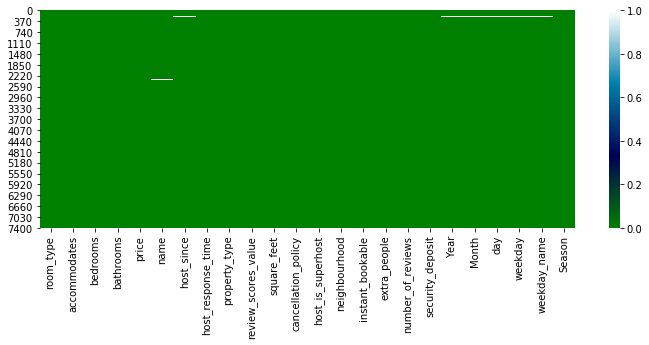

In [22]:
plt.figure(figsize=(12,4))
sns.heatmap(df_new.isna(), cmap='ocean')

In [23]:
df_new.dropna(inplace=True)

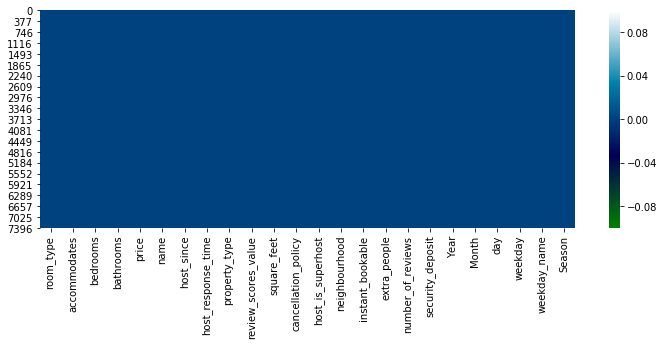

In [24]:
plt.figure(figsize=(12,4))
sns.heatmap(df_new.isna(), cmap='ocean')

## Understanding and Visualisation of data

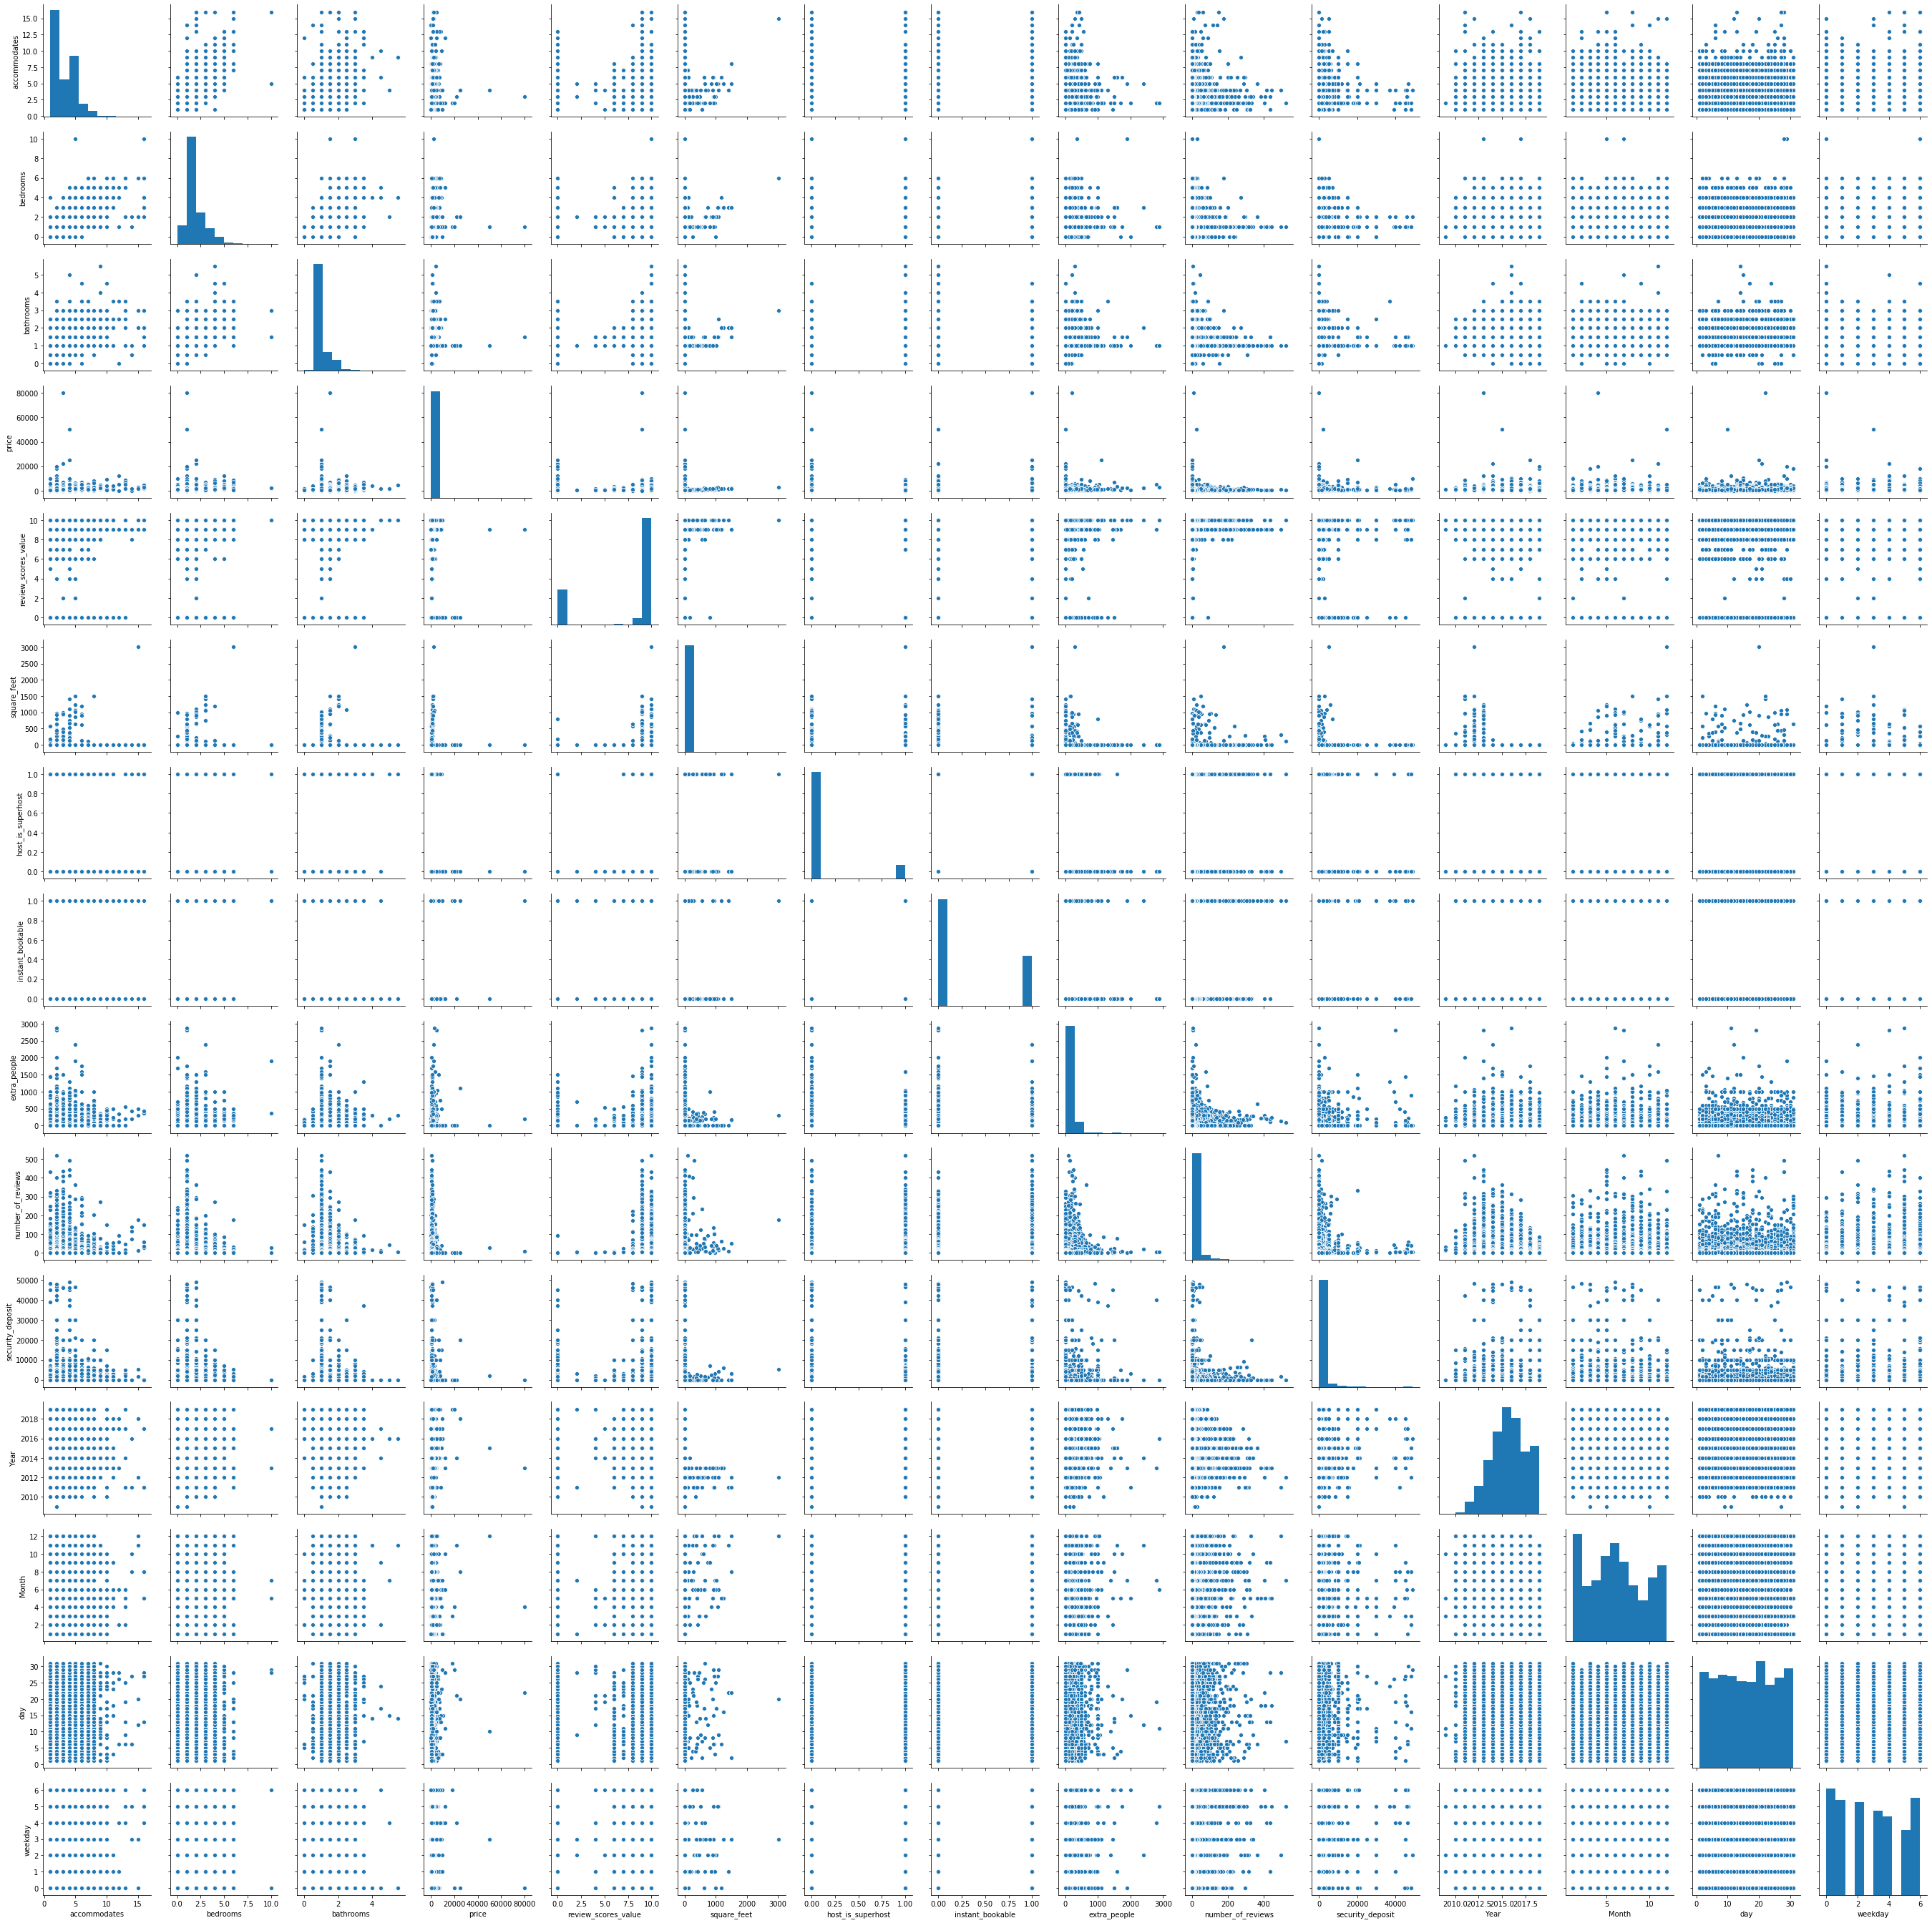

In [25]:
sns.pairplot(df_new)

In [26]:
df_new['price'].describe()

count     7705.000000
mean      1095.532511
std       1391.455741
min         96.000000
25%        632.000000
50%        900.000000
75%       1254.000000
max      80001.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Price Histogram')

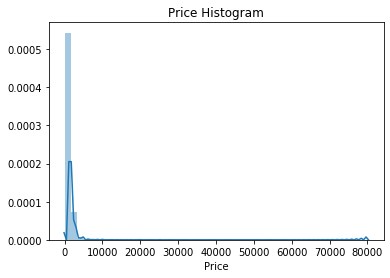

In [27]:
sns.distplot(df_new['price'])
plt.xlabel("Price")
plt.title("Price Histogram")

Text(0.5, 1.0, 'Price variation based on Season Boxplot')

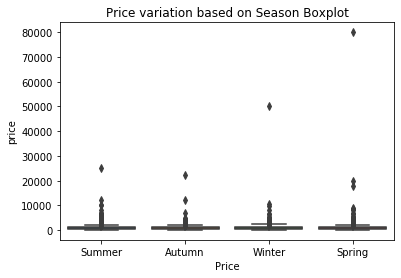

In [28]:
sns.boxplot(x='Season', y ='price', data=df_new)
plt.xlabel("Price")
plt.title("Price variation based on Season Boxplot")

##### Above boxplot shows high variation, data quality issue is identified as some data has 1100 in extra people column and security amount is also very high, values above (mean + STD) for max price will be removed, price mean and stddev will significanlty come down but we neeed to look for season demand hence we will continue with once caliberated data

Total of 393 records weill be removed from 7705 records which is 5,1%

In [29]:
df_new[df_new['price'] > np.floor(df_new['price'].mean() + df_new['price'].std())]['price'].count()

393

In [30]:
a = np.floor(df_new['price'].mean() + df_new['price'].std())
#a = 1500
df_new.drop(df_new[df_new['price']>a].index, inplace=True)

In [31]:
df_new.count()[0]

7312

#### Creating new Histogram and checking the price normality.

Text(0.5, 1.0, 'Price Distribution Plot')

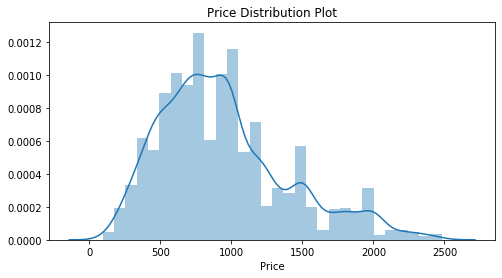

In [32]:
plt.figure(figsize=(8,4))
sns.distplot(df_new['price'], bins=30)
plt.xlabel("Price")
plt.title("Price Distribution Plot")

Text(0.5, 1.0, 'Price variation based on season')

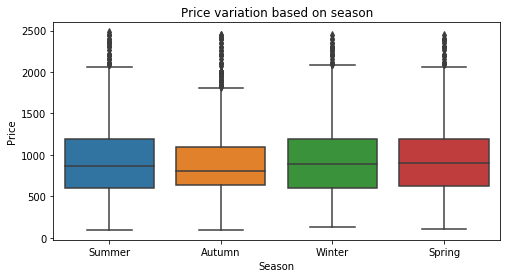

In [33]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Season', y ='price', data=df_new)
plt.xlabel("Season")
plt.ylabel("Price")
plt.title("Price variation based on season")

In [34]:
df_new['room_type'].value_counts()

Entire home/apt    5990
Private room       1213
Shared room          55
Hotel room           54
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Room type segmentation listed on list')

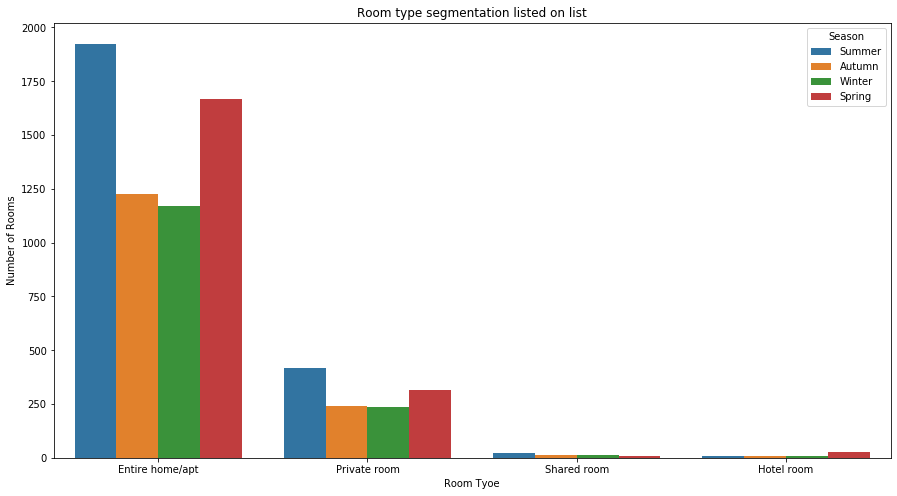

In [35]:
plt.figure(figsize=(15,8))
#sns.boxplot(x='Season', y ='price', data=df_new, hue='room_type')
sns.countplot(x='room_type', data=df_new, hue='Season')
plt.xlabel("Room Tyoe")
plt.ylabel("Number of Rooms")
plt.title("Room type segmentation listed on list")

Text(0.5, 1.0, 'Price variation based on Season and Room Type')

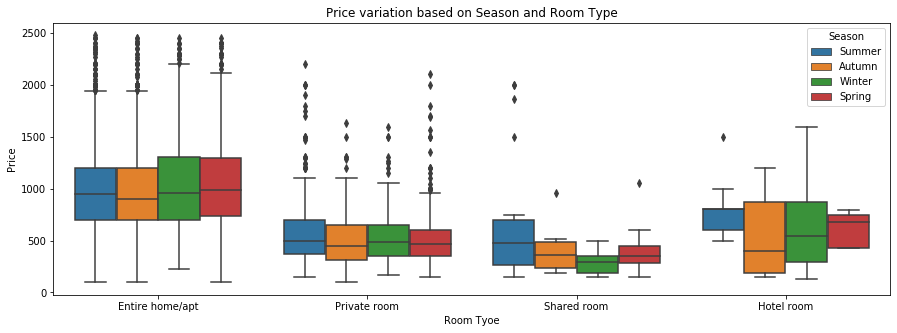

In [36]:
plt.figure(figsize=(15,5))
#sns.boxplot(x='Season', y ='price', data=df_new, hue='room_type')
sns.boxplot(x='room_type', y ='price', data=df_new, hue='Season')
plt.xlabel("Room Tyoe")
plt.ylabel("Price")
plt.title("Price variation based on Season and Room Type")

Text(0.5, 1.0, 'Price variation based on size of apartment and Season')

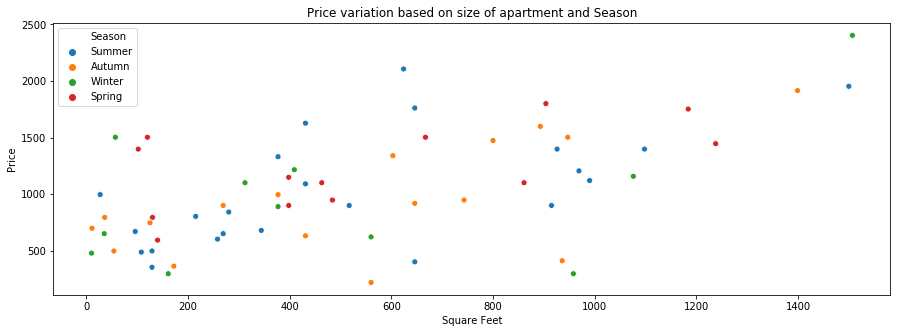

In [37]:
plt.figure(figsize=(15,5))
#sns.boxplot(x='Season', y ='price', data=df_new, hue='room_type')
sns.scatterplot(x='square_feet', y ='price', data=df_new[df_new['square_feet']>0], 
                hue='Season')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Price variation based on size of apartment and Season")


Text(0.5, 1, 'Square Feet ~ Price ~ Season')

<Figure size 1080x1080 with 0 Axes>

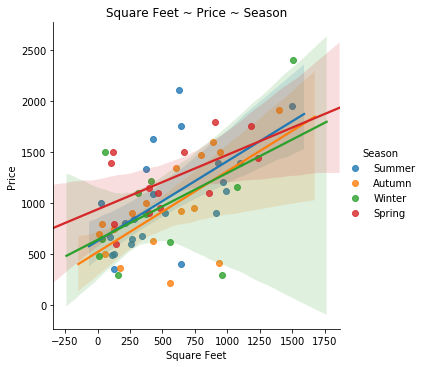

In [38]:
plt.figure(figsize=(15,15))
sns.lmplot(x='square_feet', y ='price', data=df_new[df_new['square_feet']>0], hue='Season')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Square Feet ~ Price ~ Season")
#plt.xscale("Linear")

Text(0.5, 1.0, 'Price variation based on neighbourhood')

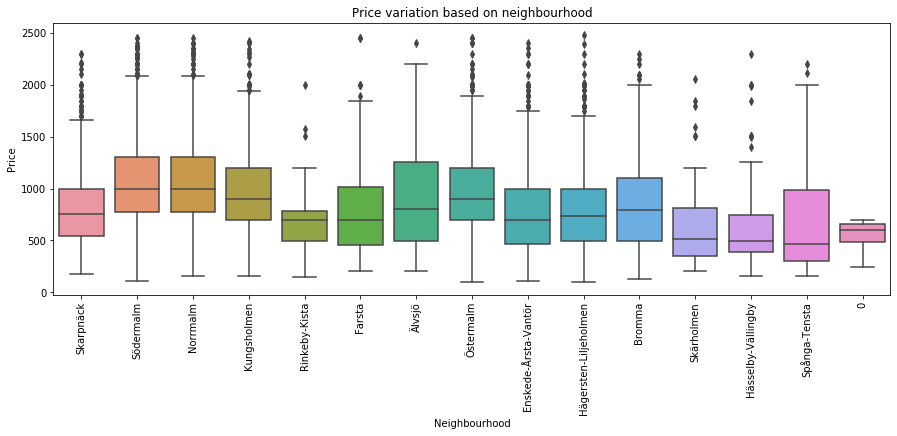

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(x='neighbourhood', y ='price', data=df_new)
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("Price variation based on neighbourhood")

Text(0.5, 1.0, 'Price variation based on Host Response Time')

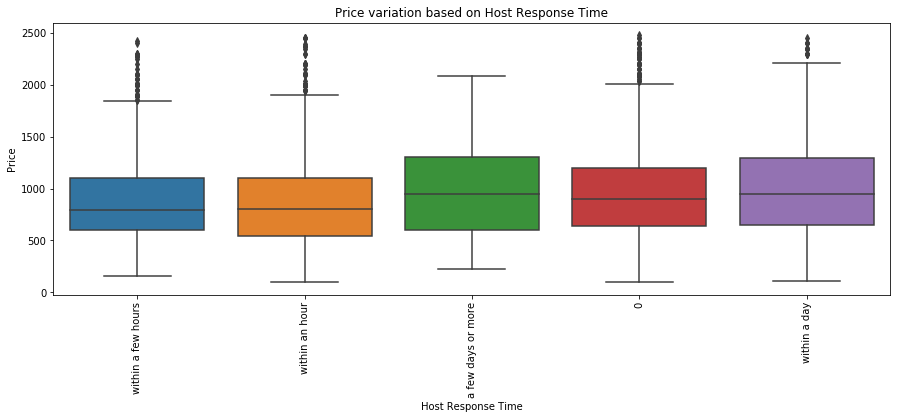

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x='host_response_time', y ='price', data=df_new)
plt.xlabel("Host Response Time")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("Price variation based on Host Response Time")

Text(0.5, 1.0, 'Price variation based on Host been a super host')

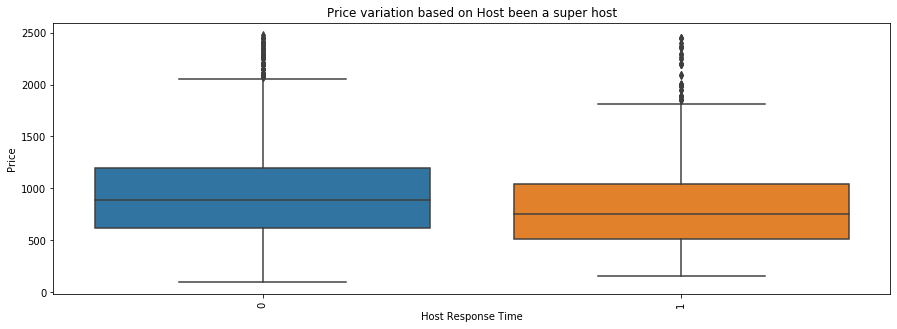

In [41]:
#df_new.columns
plt.figure(figsize=(15,5))
sns.boxplot(x='host_is_superhost', y ='price', data=df_new)
plt.xlabel("Host Response Time")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("Price variation based on Host been a super host")

Higher outlier in data observed for Room Type (Entire Home / apt and Private room) as compared to shared room and hotel room. Average price of Entire Home / apt and Private room in all season is very close, weras in regards to Shared room and Hotel room, we can observe season has an impact of proce

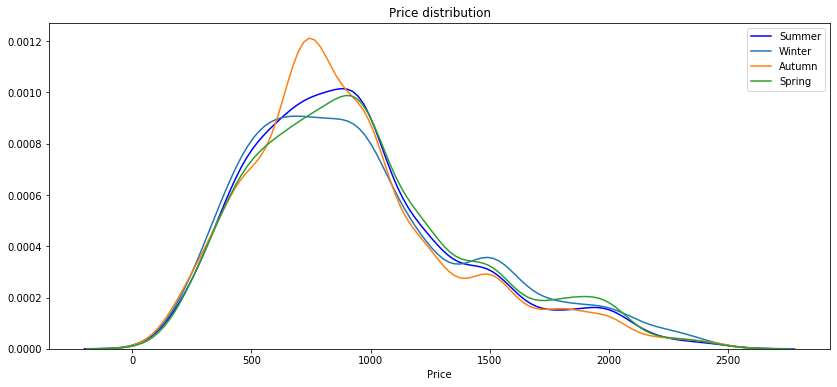

In [42]:

Summer = df_new[df_new['Season']=='Summer']['price'] 
Winter = df_new[df_new['Season']=='Winter']['price'] 
Autumn = df_new[df_new['Season']=='Autumn']['price'] 
Spring = df_new[df_new['Season']=='Spring']['price'] 

plt.figure(figsize=(14,6))
sns.kdeplot(Summer,color='blue')
sns.kdeplot(Winter)
sns.kdeplot(Autumn)
sns.kdeplot(Spring)
plt.title("Price distribution")
plt.xlabel("Price")
plt.legend(('Summer', 'Winter', 'Autumn', 'Spring'))

In [43]:
df_new.columns

Index(['room_type', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'name',
       'host_since', 'host_response_time', 'property_type',
       'review_scores_value', 'square_feet', 'cancellation_policy',
       'host_is_superhost', 'neighbourhood', 'instant_bookable',
       'extra_people', 'number_of_reviews', 'security_deposit', 'Year',
       'Month', 'day', 'weekday', 'weekday_name', 'Season'],
      dtype='object')

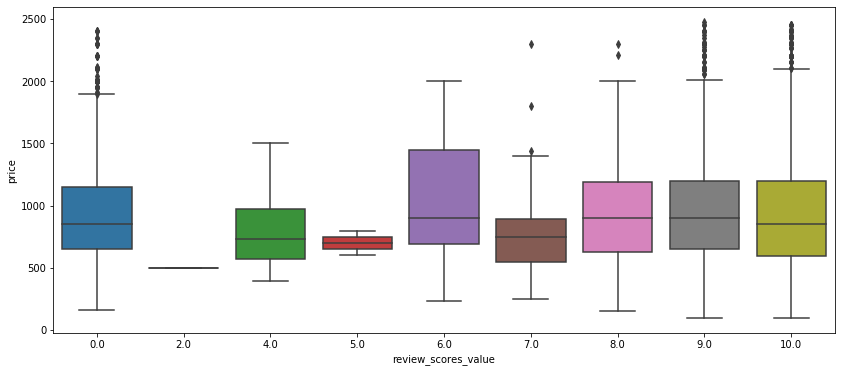

In [44]:
plt.figure(figsize=(14,6))
sns.boxplot(x='review_scores_value', y ='price', data=df_new)

Text(0.5, 1.0, 'Price variation based on no of bedrooms and Season')

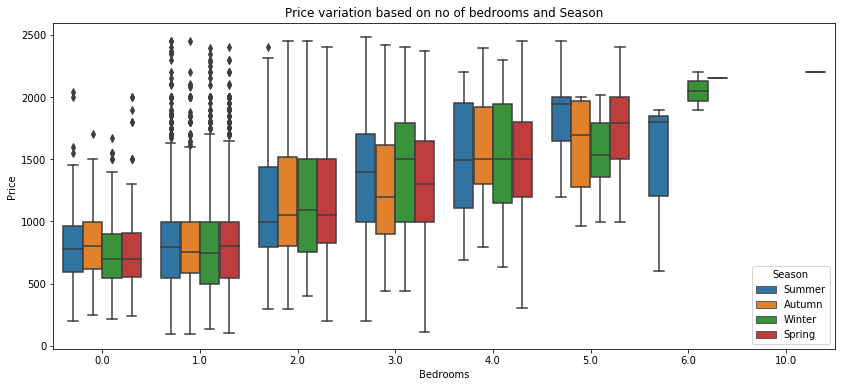

In [45]:
plt.figure(figsize=(14,6))
sns.boxplot(x='bedrooms', y ='price', data=df_new, hue='Season')
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Price variation based on no of bedrooms and Season")

Text(0.5, 1.0, 'Price variation based on no of bedrooms and Room Type')

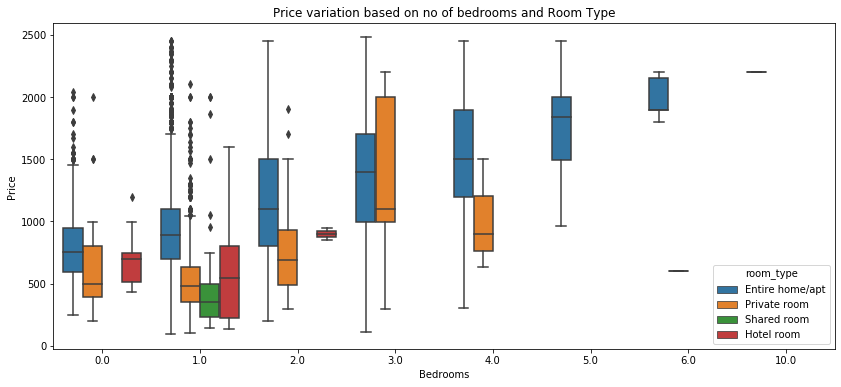

In [46]:
plt.figure(figsize=(14,6))
sns.boxplot(x='bedrooms', y ='price', data=df_new, hue='room_type')
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Price variation based on no of bedrooms and Room Type")

Text(0.5, 1.0, 'Price variation based on Cancellation policy and season')

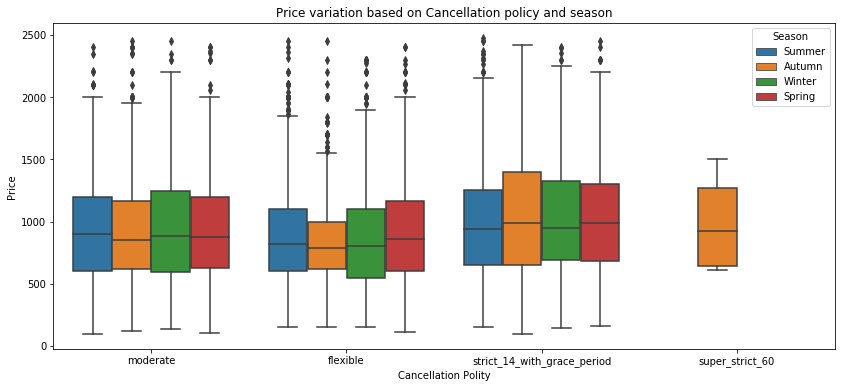

In [47]:
plt.figure(figsize=(14,6))
sns.boxplot(x='cancellation_policy', y ='price', data=df_new, hue='Season')
plt.xlabel("Cancellation Polity")
plt.ylabel("Price")
plt.title("Price variation based on Cancellation policy and season")

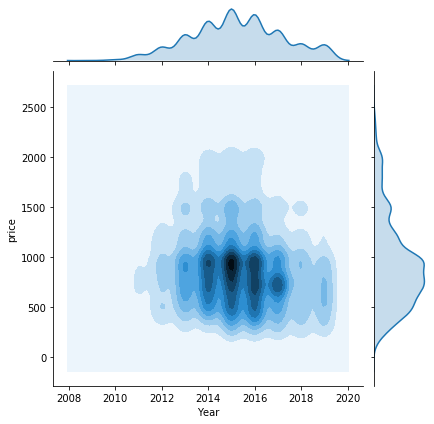

In [48]:
sns.jointplot(x='Year', y ='price', data=df_new, kind='kde')

In [49]:
df_new['Year'].value_counts()
df_new.groupby(['Year','room_type'])['room_type'].count()

Year    room_type      
2009.0  Entire home/apt       3
2010.0  Entire home/apt      25
        Private room          2
2011.0  Entire home/apt     125
        Hotel room            6
        Private room         44
        Shared room           2
2012.0  Entire home/apt     323
        Hotel room            1
        Private room         76
        Shared room           2
2013.0  Entire home/apt     634
        Private room        123
        Shared room           4
2014.0  Entire home/apt    1033
        Private room        136
        Shared room           5
2015.0  Entire home/apt    1304
        Private room        213
        Shared room          11
2016.0  Entire home/apt    1131
        Hotel room            4
        Private room        230
        Shared room          10
2017.0  Entire home/apt     729
        Hotel room            3
        Private room        159
        Shared room           4
2018.0  Entire home/apt     354
        Hotel room           15
        Private 

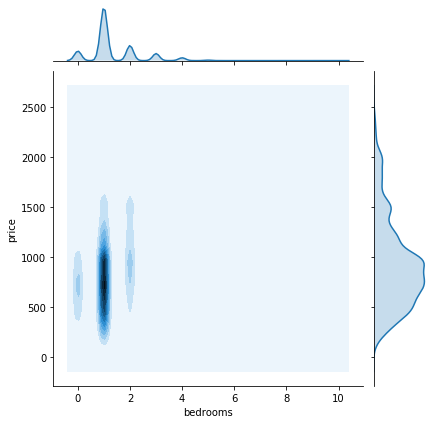

In [50]:
sns.jointplot(x='bedrooms', y ='price', data=df_new, kind='kde')

Text(27.125, 0.5, 'Price')

<Figure size 1008x432 with 0 Axes>

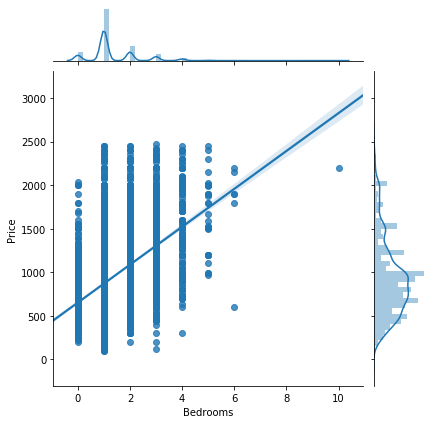

In [51]:
plt.figure(figsize=(14,6))
sns.jointplot(x='bedrooms', y ='price', data=df_new, kind='reg')
plt.xlabel("Bedrooms")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

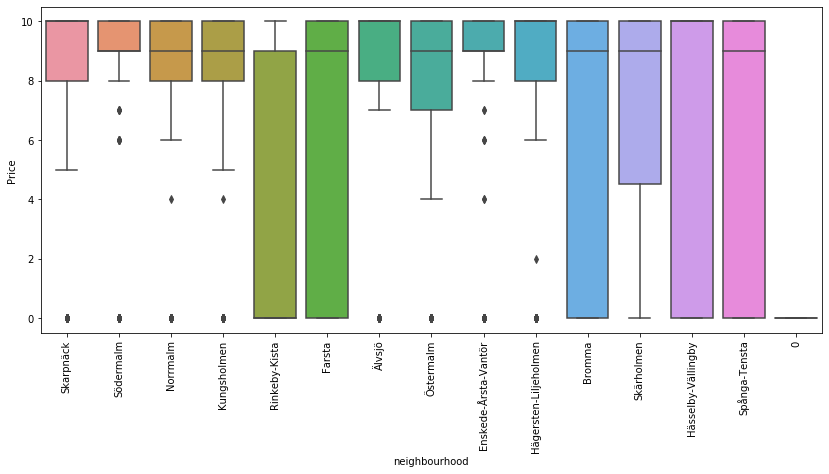

In [52]:
plt.figure(figsize=(14,6))
sns.boxplot(x='neighbourhood', y ='review_scores_value', data=df_new)
plt.xticks(rotation=90)
plt.xlabel("neighbourhood")
plt.ylabel("Price")

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

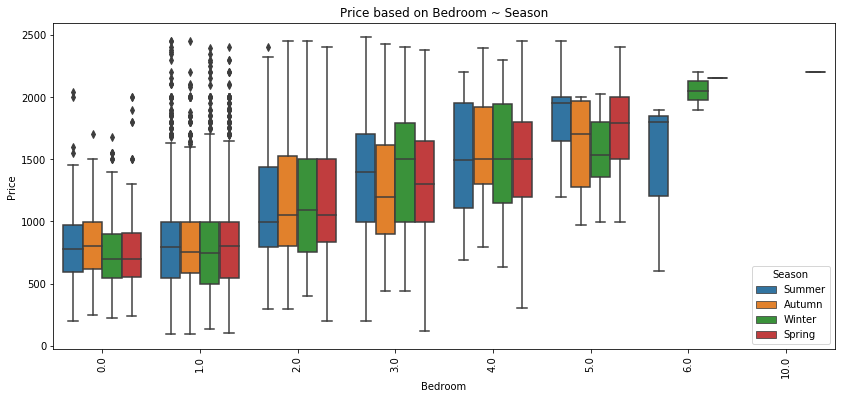

In [53]:
plt.figure(figsize=(14,6))
sns.boxplot(x='bedrooms', y ='price', data=df_new, hue='Season')
plt.xlabel("Bedroom")
plt.ylabel("Price")
plt.title("Price based on Bedroom ~ Season")
plt.xticks(rotation=90)

In [54]:
df_new.head(1)

,room_type,accommodates,bedrooms,bathrooms,price,name,host_since,host_response_time,property_type,review_scores_value,...,instant_bookable,extra_people,number_of_reviews,security_deposit,Year,Month,day,weekday,weekday_name,Season
0,Entire home/apt,3,2.0,1.0,1197.0,"Stockholm, new spacoius villa",2011-06-26,within a few hours,House,0.0,...,0,500.0,0,3000.0,2011.0,6.0,26.0,6.0,Sunday,Summer


In [55]:
room_type = pd.get_dummies(df_new['room_type'], dummy_na=False, drop_first=True)
host_response_time = pd.get_dummies(df_new['host_response_time'], dummy_na=False, drop_first=True)
property_type = pd.get_dummies(df_new['property_type'], dummy_na=False, drop_first=True)
cancellation_policy = pd.get_dummies(df_new['cancellation_policy'], dummy_na=False, drop_first=True)
neighbourhood = pd.get_dummies(df_new['neighbourhood'], dummy_na=False, drop_first=True)
season = pd.get_dummies(df_new['Season'], dummy_na=False, drop_first=True)

In [56]:
df_new.columns

Index(['room_type', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'name',
       'host_since', 'host_response_time', 'property_type',
       'review_scores_value', 'square_feet', 'cancellation_policy',
       'host_is_superhost', 'neighbourhood', 'instant_bookable',
       'extra_people', 'number_of_reviews', 'security_deposit', 'Year',
       'Month', 'day', 'weekday', 'weekday_name', 'Season'],
      dtype='object')

In [57]:
df_new.corr()

,accommodates,bedrooms,bathrooms,price,review_scores_value,square_feet,host_is_superhost,instant_bookable,extra_people,number_of_reviews,security_deposit,Year,Month,day,weekday
accommodates,1.000000,0.699779,0.407998,0.491181,0.039852,0.033470,-0.053011,-0.010423,0.092561,-0.022723,0.031577,-0.025042,-0.059076,-0.014344,0.015894
bedrooms,0.699779,1.000000,0.535235,0.446490,0.004672,0.034367,-0.076724,-0.038389,0.033406,-0.071926,0.027523,-0.055106,-0.073962,-0.015703,0.020471
bathrooms,0.407998,0.535235,1.000000,0.263070,0.018025,0.032669,0.010543,0.000584,0.042660,-0.031426,0.017112,-0.007409,-0.046015,-0.011889,0.010984
price,0.491181,0.446490,0.263070,1.000000,0.003087,0.051084,-0.059818,-0.088363,0.080727,-0.064292,0.069017,-0.090655,-0.034704,-0.011051,-0.018219
review_scores_value,0.039852,0.004672,0.018025,0.003087,1.000000,0.034502,0.183968,-0.069963,0.135129,0.237119,0.012971,-0.082796,-0.067476,-0.020209,-0.032134
square_feet,0.033470,0.034367,0.032669,0.051084,0.034502,1.000000,0.041073,-0.021500,0.029773,0.090052,0.007166,-0.118705,0.038437,-0.000244,-0.012742
host_is_superhost,-0.053011,-0.076724,0.010543,-0.059818,0.183968,0.041073,1.000000,0.070715,0.095750,0.361037,0.017934,-0.046015,0.008239,0.016488,0.031953
instant_bookable,-0.010423,-0.038389,0.000584,-0.088363,-0.069963,-0.021500,0.070715,1.000000,-0.047474,0.057350,-0.046959,0.288331,0.050023,0.006236,0.055669
extra_people,0.092561,0.033406,0.042660,0.080727,0.135129,0.029773,0.095750,-0.047474,1.000000,0.124886,0.170863,-0.089923,0.017607,0.022776,-0.008131
number_of_reviews,-0.022723,-0.071926,-0.031426,-0.064292,0.237119,0.090052,0.361037,0.057350,0.124886,1.000000,0.007888,-0.132134,0.014997,0.007788,0.030361


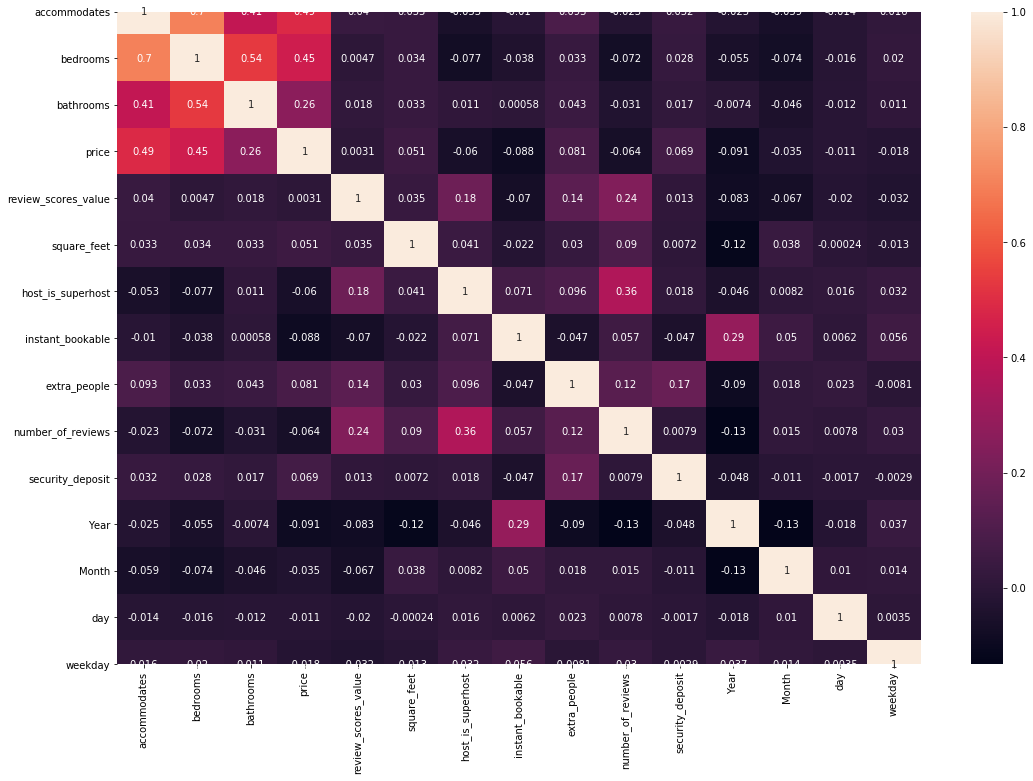

In [58]:
plt.figure(figsize=(18,12))
sns.heatmap(df_new.corr(), annot=True)

In [59]:
df_new = pd.concat([df_new, room_type, host_response_time, 
                    property_type, cancellation_policy, neighbourhood, season],axis=1)

In [60]:
df_new.drop(['room_type', 'host_response_time', 
        'property_type', 'cancellation_policy','neighbourhood','Season'],axis=1,inplace=True) #neighbourhood

In [61]:
df_new.head(1)

,accommodates,bedrooms,bathrooms,price,name,host_since,review_scores_value,square_feet,host_is_superhost,instant_bookable,...,Rinkeby-Kista,Skarpnäck,Skärholmen,Spånga-Tensta,Södermalm,Älvsjö,Östermalm,Spring,Summer,Winter
0,3,2.0,1.0,1197.0,"Stockholm, new spacoius villa",2011-06-26,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Modeling: Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
df_new.columns

Index(['accommodates', 'bedrooms', 'bathrooms', 'price', 'name', 'host_since',
       'review_scores_value', 'square_feet', 'host_is_superhost',
       'instant_bookable', 'extra_people', 'number_of_reviews',
       'security_deposit', 'Year', 'Month', 'day', 'weekday', 'weekday_name',
       'Hotel room', 'Private room', 'Shared room', 'a few days or more',
       'within a day', 'within a few hours', 'within an hour', 'Apartment',
       'Bed and breakfast', 'Boat', 'Boutique hotel', 'Cabin', 'Camper/RV',
       'Condominium', 'Cottage', 'Earth house', 'Farm stay', 'Guest suite',
       'Guesthouse', 'Hostel', 'Hotel', 'House', 'Houseboat', 'In-law', 'Loft',
       'Nature lodge', 'Other', 'Serviced apartment', 'Tiny house',
       'Townhouse', 'Treehouse', 'Villa', 'moderate',
       'strict_14_with_grace_period', 'super_strict_60', 'Bromma',
       'Enskede-Årsta-Vantör', 'Farsta', 'Hägersten-Liljeholmen',
       'Hässelby-Vällingby', 'Kungsholmen', 'Norrmalm', 'Rinkeby-Kista',
   

In [64]:
X = df_new[['accommodates', 'bedrooms', 'bathrooms', 
       'review_scores_value', 'square_feet', 'host_is_superhost',
       'instant_bookable', 'Year', 'Month', 'day', 'weekday',
       'Hotel room', 'Private room', 'Shared room', 'a few days or more',
       'within a day', 'within a few hours', 'within an hour', 'Apartment',
       'Bed and breakfast', 'Boat', 'Boutique hotel', 'Cabin', 'Camper/RV',
       'Condominium', 'Cottage', 'Earth house', 'Farm stay', 'Guest suite',
       'Guesthouse', 'Hostel', 'Hotel', 'House', 'Houseboat', 'In-law', 'Loft',
       'Nature lodge', 'Other', 'Serviced apartment', 'Tiny house',
       'Townhouse', 'Treehouse', 'Villa', 'moderate',
       'strict_14_with_grace_period', 'super_strict_60', 'Bromma',
       'Enskede-Årsta-Vantör', 'Farsta', 'Hägersten-Liljeholmen',
       'Hässelby-Vällingby', 'Kungsholmen', 'Norrmalm', 'Rinkeby-Kista',
       'Skarpnäck', 'Skärholmen', 'Spånga-Tensta', 'Södermalm', 'Älvsjö',
       'Östermalm', 'Spring', 'Summer', 'Winter', 'extra_people', 'number_of_reviews',
           'security_deposit']]

y = df_new['price']

In [65]:
X.head(3)

,accommodates,bedrooms,bathrooms,review_scores_value,square_feet,host_is_superhost,instant_bookable,Year,Month,day,...,Spånga-Tensta,Södermalm,Älvsjö,Östermalm,Spring,Summer,Winter,extra_people,number_of_reviews,security_deposit
0,3,2.0,1.0,0.0,0.0,0,0,2011.0,6.0,26.0,...,0,0,0,0,0,1,0,500.0,0,3000.0
2,2,1.0,1.0,10.0,0.0,1,1,2011.0,7.0,6.0,...,0,1,0,0,0,1,0,0.0,317,0.0
3,2,1.0,1.0,10.0,96.0,0,0,2011.0,8.0,26.0,...,0,1,0,0,0,1,0,200.0,78,0.0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
lm = LinearRegression()

In [68]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
print('intercept:', lm.intercept_)

intercept: 989.1703998699669


In [70]:
print(lm.coef_)

[ 6.77560893e+01  1.20237078e+02  5.61957186e+01 -4.45125705e+00
  1.62070262e-01  3.54386965e+00 -7.69764197e+00 -1.61406037e-02
 -1.30263788e+00 -4.09399484e-01 -1.76253122e+00  1.77385599e+01
 -2.87773001e+02 -2.48805195e+02  1.06548430e+02  6.75981642e+01
  8.70792227e+01  3.48687063e+01 -6.24175829e+02 -5.57598121e+02
 -6.27723946e+02 -4.88673733e+02 -4.41089914e+02 -7.76070436e+02
 -5.64251733e+02 -1.07965650e+03 -7.13978975e+02  8.52651283e-13
 -7.82251443e+02 -7.28060825e+02 -1.63179345e+03 -7.63207688e+02
 -4.59561005e+02 -4.22385460e+02 -8.41377003e+02 -4.17182945e+02
 -1.06313182e+03 -2.98339455e+02 -5.25365491e+02 -4.69344312e+02
 -5.57611383e+02 -1.13686838e-13 -5.03344578e+02  1.27119308e+01
  5.31168960e+01 -4.19010709e+01  2.72714737e+01  4.89987973e+01
 -5.20280436e+01  9.23203263e+01 -8.28596685e+01  3.01802547e+02
  4.05158183e+02  2.50152592e+01  8.27824097e+01 -6.54035907e+01
 -3.46946521e+01  3.81743513e+02  2.40777013e+01  3.54489221e+02
  9.26262425e-01 -1.79381

In [71]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [72]:
cdf

,Coeff
accommodates,67.756089
bedrooms,120.237078
bathrooms,56.195719
review_scores_value,-4.451257
square_feet,0.162070
...,...
Summer,-1.793810
Winter,-8.085151
extra_people,0.059567
number_of_reviews,-0.488207


In [73]:
prediction = lm.predict(X_test)

In [74]:
prediction

array([ 872.61964571, 1217.99836676,  675.19703317, ...,  433.86964622,
       1150.77061356, 1259.84375038])

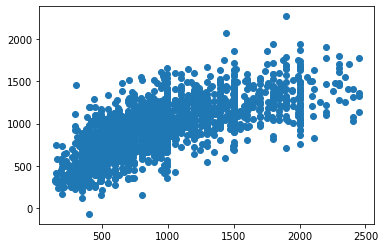

In [75]:
plt.scatter(y_test, prediction)

In [76]:
lm.score(X, y)

0.4810009876187498

In [78]:
from sklearn import metrics

In [84]:
metrics.mean_absolute_error(y_test, prediction) # mean of abdolute Error - Average Error

243.22135069887642

In [85]:
metrics.mean_squared_error(y_test, prediction) # mean of Squared Error

103116.77616834042

In [86]:
np.sqrt(metrics.mean_squared_error(y_test, prediction)) # Root of mean Squared Error

321.1180097228127

In [87]:
metrics.explained_variance_score(y_test, prediction)

0.5001720629752292

In [88]:
metrics.r2_score(y_test, prediction)

0.49996185844688434

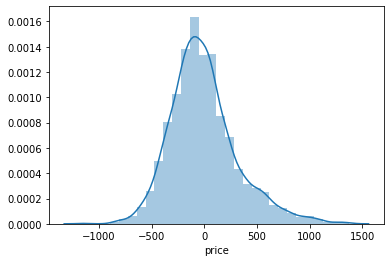

In [89]:
sns.distplot(y_test-prediction, bins=30)

In [90]:
cdf

,Coeff
accommodates,67.756089
bedrooms,120.237078
bathrooms,56.195719
review_scores_value,-4.451257
square_feet,0.162070
...,...
Summer,-1.793810
Winter,-8.085151
extra_people,0.059567
number_of_reviews,-0.488207


In [95]:
metrics.r2_score(y_test, prediction)

0.49996185844688434